# 📱 Smartphone Market Analysis

## 📦 1. Importing Required Liabraries

In [1]:
# Importing Required Liabraries
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 🌐 2. Data Collection

In [2]:
# Scraping Products From Flipkart
# Creating an Empty List Named Items
items = []

# Looping Through All Pages
for i in range(1,35):
    with open(f"htmls/page-{i}.html", encoding='utf-8') as f:
        soup = BeautifulSoup(f.read(), "html.parser")
    
    # Creating Products And Looping Through Each Product    
    products = soup.find_all("div", class_="nZIRY7")
    for product in products:
        # Title
        product_title = product.find("div", class_="RG5Slk")
        title = product_title.text if product_title else None

        # Price
        product_price = product.find("div", class_="hZ3P6w DeU9vF")
        price = product_price.text if product_price else None

        # Discount
        discount_div = product.find("div", class_="HQe8jr")
        if discount_div:
            span = discount_div.find("span")
            discount = span.text.split()[0] if span else None
        else:
            discount = None

        # Rating Int
        rating_int = product.find("div", class_="MKiFS6")
        if rating_int:
           star_rating = rating_int.text
        else:
            star_rating = None

        # Rating Count
        rating_element = product.find("span", string=lambda x: x and "Ratings" in x)
        if rating_element:
            rating_count = rating_element.text.split()[0]
        else:
            rating_count = None

        # Reviews Count
        reviews_element = product.find("span", string=lambda x: x and "Reviews" in x)
        if reviews_element:
            reviews_count = reviews_element.text.split()[0]
        else:
            reviews_count = None

        # Appending All The Things In Empty List Of Items
        items.append([title,
                     price,
                     discount,
                     star_rating,
                     rating_count,
                     reviews_count])

## 🧾 3. Creating Data Frame

In [3]:
# Creating Data Frame
df = pd.DataFrame(items, columns=["Title", "Price", "Discount", "Star Rating", "Rating Count", "Reviews Count" ])

## 4.📥 Saving Raw Data (Unprocessed)

In [4]:
df.to_excel("Raw_Data.xlsx", index=False)
df.to_csv("Raw_Data.csv", index=False)

## 🧹 5. Data Cleaning

In [5]:
# Cleaning The Data
df["Price"] = df["Price"].str.replace(r"[₹,]", "", regex=True)
df["Discount"] = df["Discount"].str.replace("%", "", regex=True)
df["Rating Count"] = df["Rating Count"].str.replace(",", "", regex=True)
df["Reviews Count"] = df["Reviews Count"].str.replace(",", "", regex=True)

## 🔢 6. Convert Data To Numeric

In [6]:
# Convert Data To Numeric
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")
df["Discount"] = pd.to_numeric(df["Discount"], errors="coerce")
df["Star Rating"] = pd.to_numeric(df["Star Rating"], errors="coerce")
df["Rating Count"] = pd.to_numeric(df["Rating Count"], errors="coerce")
df["Reviews Count"] = pd.to_numeric(df["Reviews Count"], errors="coerce")

## 📋 7. Describing The Scraped Data

In [7]:
# Describing The Scraped Data
df.describe()

,Price,Discount,Star Rating,Rating Count,Reviews Count
count,816.000000,752.000000,816.000000,816.000000,816.000000
mean,25803.884804,25.050532,4.365441,22596.676471,1297.578431
std,20053.741662,12.224165,0.160006,42424.229794,2843.727719
min,5999.000000,1.000000,3.800000,4.000000,0.000000
25%,14996.750000,14.000000,4.300000,1263.000000,80.000000
50%,18840.500000,25.000000,4.400000,6155.500000,390.000000
75%,29074.000000,33.000000,4.500000,37263.000000,2125.000000
max,169900.000000,50.000000,5.000000,603397.000000,63614.000000


## 🔍 8. Finding Null Data

In [8]:
# Finding Null Data
df.isna().sum()

Title             0
Price             0
Discount         64
Star Rating       0
Rating Count      0
Reviews Count     0
dtype: int64

## 🔧 9. Filling Null Data With 0

In [9]:
# Filling Null Data With 0
df.fillna(0)

,Title,Price,Discount,Star Rating,Rating Count,Reviews Count
0,"Samsung Galaxy S24 5G Snapdragon (Marble Gray,...",40999,45.0,4.6,46887,2583
1,"realme P4x 5G (Matte Silver, 128 GB)",15999,11.0,4.4,2128,233
2,"realme C61 (Marble Black, 64 GB)",6999,22.0,4.3,39071,1258
3,"POCO C71 (Desert Gold, 128 GB)",7299,27.0,4.1,28811,1359
4,"Samsung Galaxy A35 5G (Awesome Lilac, 128 GB)",18499,45.0,4.4,64204,3720
...,...,...,...,...,...,...
811,"realme 14X 5G (JWEL RED, 128 GB)",14990,11.0,4.3,13686,669
812,"realme GT 6T 5G (Fluid Silver, 256 GB)",31446,17.0,4.5,1267,108
813,"OnePlus Nord 4 5G (Mercurial Silver, 256 GB)",30990,13.0,4.5,720,31
814,"Samsung Galaxy M16 5G (Blush Pink, 128 GB)",17499,0.0,4.3,217,9


## 🏷️ 10. Creatng Price-wise Categories

In [10]:
df["Category"] = pd.cut(
    df["Price"],
    bins=[0, 10000, 30000, 75000, np.inf],
    labels=["Budget", "Mid", "Premium", "Luxury"]
)

## 🔢 11. Counting Products per Price Segment

In [11]:
df["Category"].value_counts()

Category
Mid        519
Premium    147
Budget     103
Luxury      47
Name: count, dtype: int64

## 🧼 12. Saving Cleaned Data (Processed)

In [12]:
df.to_excel("Cleaned_Data.xlsx", index=False)
df.to_csv("Cleaned_Data.csv", index=False)

## 📊 13. Exploratory Data Analysis

### 💰⭐ 1. Price Vs Star Rating

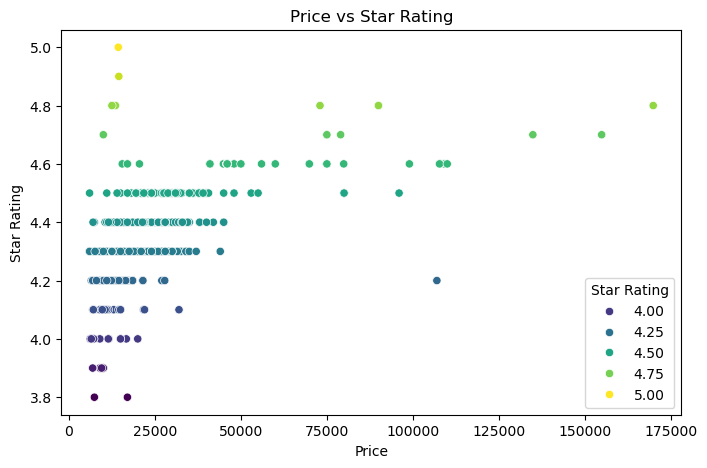

In [13]:
# Exploratory Data Analysis

# Price Vs Star Rating
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,
                x="Price",
                y="Star Rating",
                hue="Star Rating",
                palette="viridis"
               )
plt.title("Price vs Star Rating")
plt.savefig("Price_vs_Rating")
plt.show()

### 💸⭐ 2. Relationship Between Discount Percentage and Product Rating

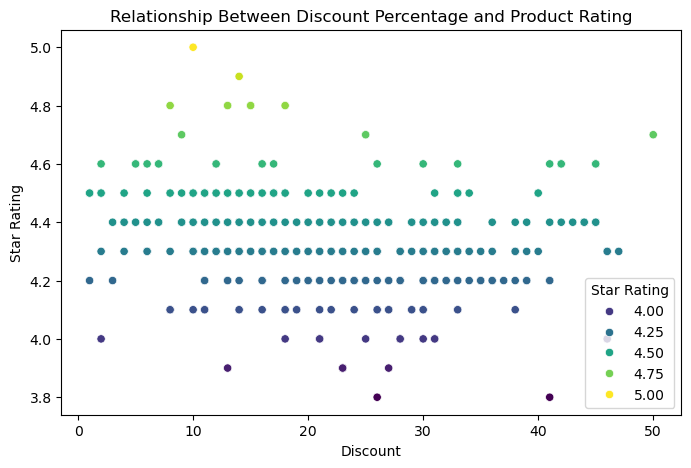

In [14]:
# Do higher discounts lead to better ratings?
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,
                x="Discount",
                y="Star Rating",
                hue="Star Rating",
                palette="viridis"
               )
plt.title("Relationship Between Discount Percentage and Product Rating")
plt.savefig("Relation_Discount_Rating")
plt.show()

### 📊💰 3. Market Price Distribution

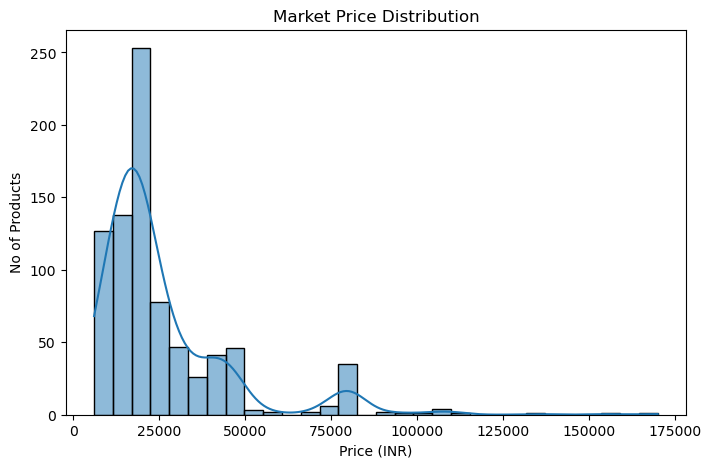

In [15]:
# Market Price Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Price"], bins=30, kde=True)
plt.title("Market Price Distribution")
plt.xlabel("Price (INR)")
plt.ylabel("No of Products")
plt.savefig("Market_Price_Distribution")
plt.show()

### ⭐📊 4. Customer Star Rating Distribution

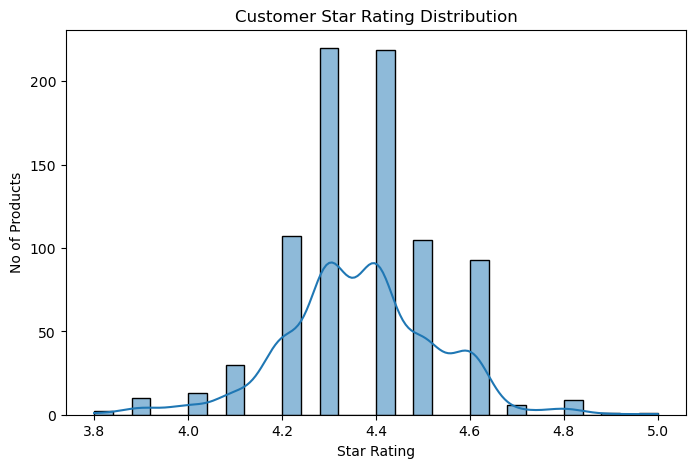

In [16]:
# Customer Star Rating Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Star Rating"], bins=30, kde=True)
plt.title("Customer Star Rating Distribution")
plt.xlabel("Star Rating")
plt.ylabel("No of Products")
plt.savefig("Customer_Rating_Distribution")
plt.show()

### 📈💰⭐ 5. Price Vs Rating With Trend Line

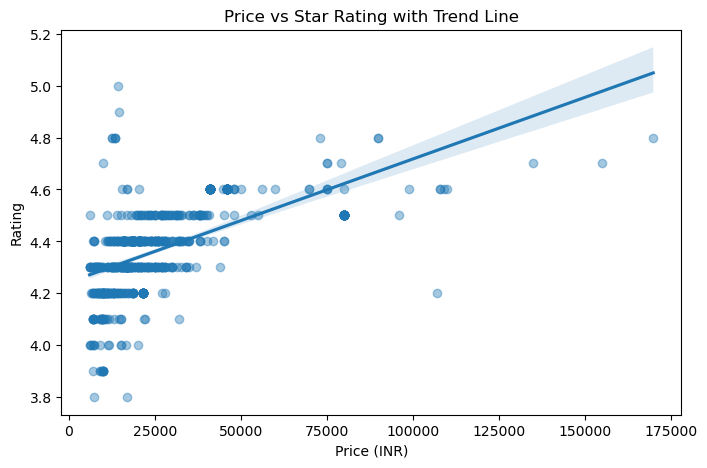

In [17]:
# Price Vs Rating With Trend Line
plt.figure(figsize=(8,5))
sns.regplot(data=df,
                x="Price",
                y="Star Rating",
                scatter_kws={"alpha":0.4}
               )
plt.title("Price vs Star Rating with Trend Line")
plt.xlabel("Price (INR)")
plt.ylabel("Rating")
plt.savefig("Price_vs_Rating_with_trend")
plt.show()

### 6. ⭐ Average Star Rating by Price Category

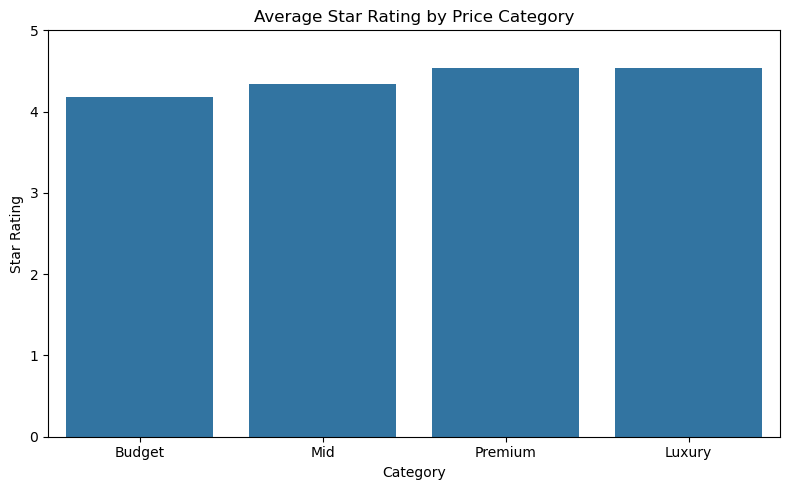

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(data=df,
            x="Category",
            y="Star Rating",
            estimator="mean",
            errorbar=None
           )
plt.title("Average Star Rating by Price Category")
plt.xlabel("Category")
plt.ylabel("Star Rating")
plt.savefig("Average_Star_Rating_by_Price_Category")
plt.ylim(0,5)
plt.tight_layout()
plt.show()

### 🧮 7. Number of Products per Price Segment

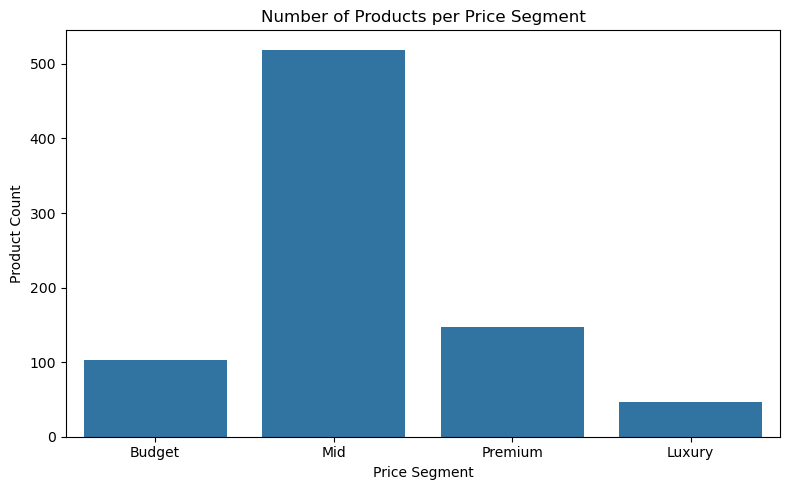

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Category")
plt.title("Number of Products per Price Segment")
plt.xlabel("Price Segment")
plt.ylabel("Product Count")
plt.tight_layout()
plt.savefig("Number_of_Products_per_Price_Segment")
plt.show()

## 💡 14. Business Insights & Recommendations


### 💰 INSIGHT 1 — Price vs Rating = Weak Relationship

***📌 Observation***

Trendline in Price vs Rating is nearly flat.

***🧪 Analysis***

Higher price ≠ better satisfaction

Customers value:
✔ usability
✔ performance
✔ reliability
More than luxury pricing.

***💼 Business Interpretation***

Premium pricing must be supported by real value.

***✅ Recommendation***

Focus investments on product quality & user experience — not pricing alone.

### 🏷 INSIGHT 2 — Discounts vs Rating

***📌 Observation***

Higher discounts do not correlate strongly with better ratings.

***🧪 Analysis***

Discounts:

Help short-term conversion

Do not improve product satisfaction

***💼 Business Interpretation***

Customer loyalty ≠ price drops

***✅ Recommendation***

Use discounts for inventory & seasonal strategy,
not as a core value proposition.

### 🧠 INSIGHT 3 — Market Price Structure

***📌 Observation:***

From the Market Price Distribution chart:

Most products fall into low to mid-price ranges

High-end products are fewer

***🧪 Analysis:***

The market is price-sensitive

Demand = strongest in affordable segments

Competition = highest in mid-range

***💼 Business Interpretation:***

Growth opportunities exist in:
✔ value-driven segments
✔ feature-rich mid-tier products

***✅ Recommendation:***

Position new products in competitive mid-range pricing, while differentiating through features and build-quality.

### ⭐ INSIGHT 4 — Star Rating Distribution Bias

***📌 Observation***

Ratings are skewed toward 4–5 stars

Very few low ratings

***🧪 Analysis***

Customers:

Leave reviews mostly when satisfied

Under-report negative experiences

***💼 Business Interpretation***

Ratings alone do not fully reflect dissatisfaction.

***✅ Recommendation***

Track additional metrics such as:

return rate

customer complaints

repeat purchases

### ⭐ INSIGHT 5 — Price vs Rating (WITH TREND LINE)

***📌 Observation***

The scatter points are spread out

The trend line is nearly flat

Expensive products are not always higher rated

Many mid-range and budget products still have 4+ star ratings

***🧪 Analysis***

This means:

✔ Satisfaction ≠ driven by price
✔ Users reward:

performance

reliability

features

value

❌ Users don’t rate higher just because a product is costly

***💼 Business Interpretation***

A product's perceived value matters more than its price bracket.

So companies:

cannot rely on premium pricing alone

must justify price through benefits

should invest in quality, UX, and after-sales

***✅ Business Recommendation***

Focus on designing high-value products, not just high-price ones.

Strengthen:

durability

performance

user experience

customer service

Premium pricing only works when value perception increases too.

### ⭐ Insight 6 — Average Star Rating by Price Category

***📌 Observation***

From the chart “Number of Products per Category”:

Most products belong to the Budget and Mid categories

Premium and Luxury categories contain noticeably fewer products

This means the distribution is heavily concentrated in lower-priced categories

***🧪 Analysis***

This indicates that the market is:

Strongly price-conscious

Driven mainly by affordable product offerings

Competitive in the Budget & Mid categories

Premium and Luxury categories exist — but represent smaller niches rather than the main market.

***💼 Business Interpretation***

Brands focus on Budget & Mid categories because:

These reach the widest audience

Sales volume is highest here

Demand is consistent

Luxury products are positioned mainly for brand prestige & higher margins, not volume.

***✅ Recommendation***

Businesses entering this space should prioritize Budget and Mid categories first, while treating Premium & Luxury offerings as strategic differentiation tiers rather than primary revenue drivers.

### ⭐ INSIGHT 7 — Number of Products per Price Segment

***📌 Observation***

From the bar chart, we see that:

Most products fall into the Budget and Mid-range segments

Premium and Luxury segments have far fewer products

The distribution is clearly skewed toward lower-priced categories

***🧪 Analysis***

This indicates that the market is:

Highly price-sensitive

Dominated by affordable product offerings

Structured around value-focused consumers

Brands appear to compete most aggressively in the Budget and Mid segments, where demand is highest.

***💼 Business Interpretation***

Companies prioritize these price bands because:

They attract the largest customer base

Sales volume is higher

Market adoption is easier

Premium/Luxury products exist, but represent niche positioning.

***✅ Recommendation***

Businesses entering this market should prioritize Budget & Mid-range offerings, while using Premium & Luxury tiers for brand positioning and margin-focused strategies.

# 🧠 Final Business Summary

***“Our analysis shows that while Premium products have slightly higher ratings on average, Price is not a strong driver of customer satisfaction. Customers evaluate overall Value — including performance, reliability, usability, and experience — rather than price alone. Discounts also do not significantly influence ratings, indicating that promotions may boost short-term sales conversions but do not improve long-term product perception.”***